# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [2]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

       Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0         27      26       5       5      22      20       20   
1         28      27       5       6      23      22       20   
2         29      26       6       5      24      21       20   
3         28      27       5       6      23      22       20   
4         28      26       5       5      23      21       20   
...      ...     ...     ...     ...     ...     ...      ...   
39204     52      56       5       6      47      51       42   
39205     56      58       5       5      51      53       42   
39206     58      62       5       6      53      57       42   
39207     63      69       5       7      58      63       42   
39208     68      69       7       6      62      63       42   

                                 Path  
0      Train/20/00020_00000_00000.png  
1      Train/20/00020_00000_00001.png  
2      Train/20/00020_00000_00002.png  
3      Train/20/00020_00000_00003.png  
4      Train/20/000

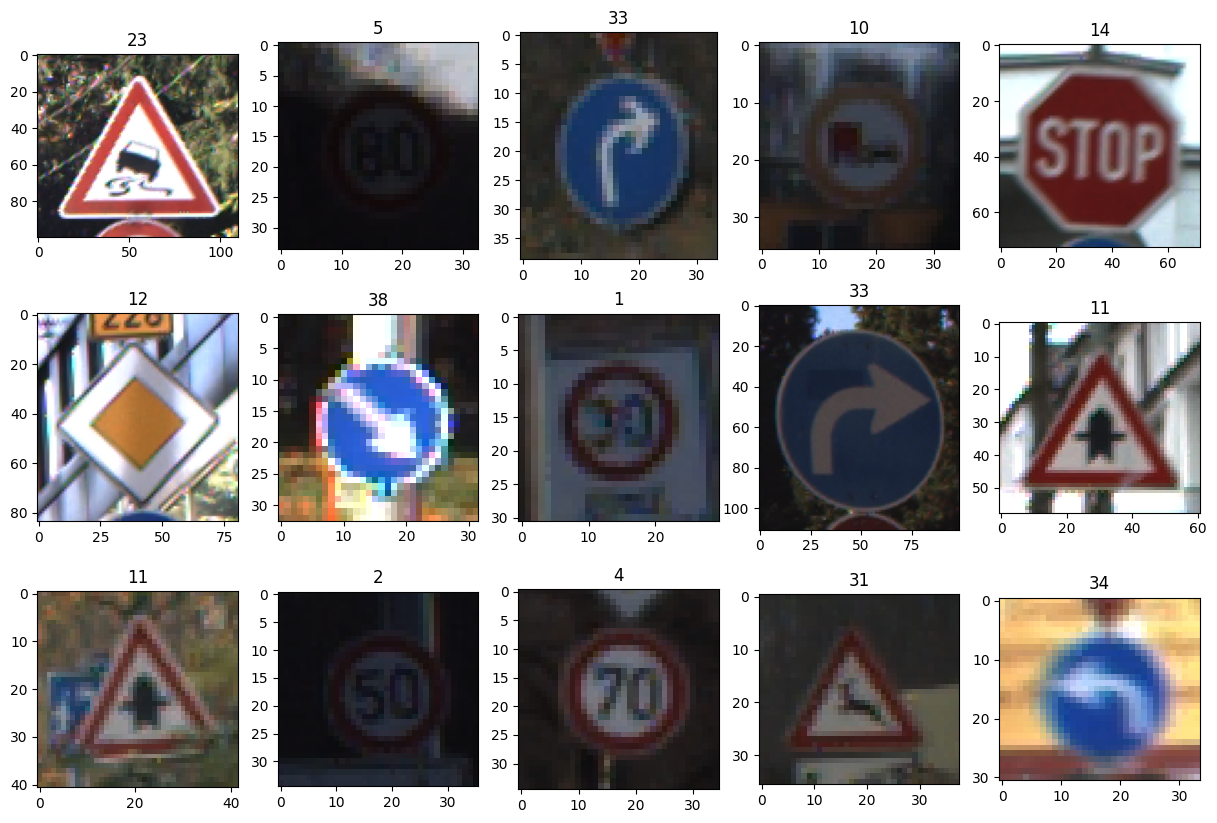

In [3]:
# Load the training labels
root = '../data' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))
print(data)
print(data.shape)
# Number of training samples (amount of samples in data)
num_samples = len(data)
#print(num_samples)
# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [25]:
# Extract class identifiers
# Hint: Check the csv 
ids =data['ClassId']
print (ids)

0        20
1        20
2        20
3        20
4        20
         ..
39204    42
39205    42
39206    42
39207    42
39208    42
Name: ClassId, Length: 39209, dtype: int64


Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

dict_values([360, 210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240])
Mean value of count : 911.8372093023256


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

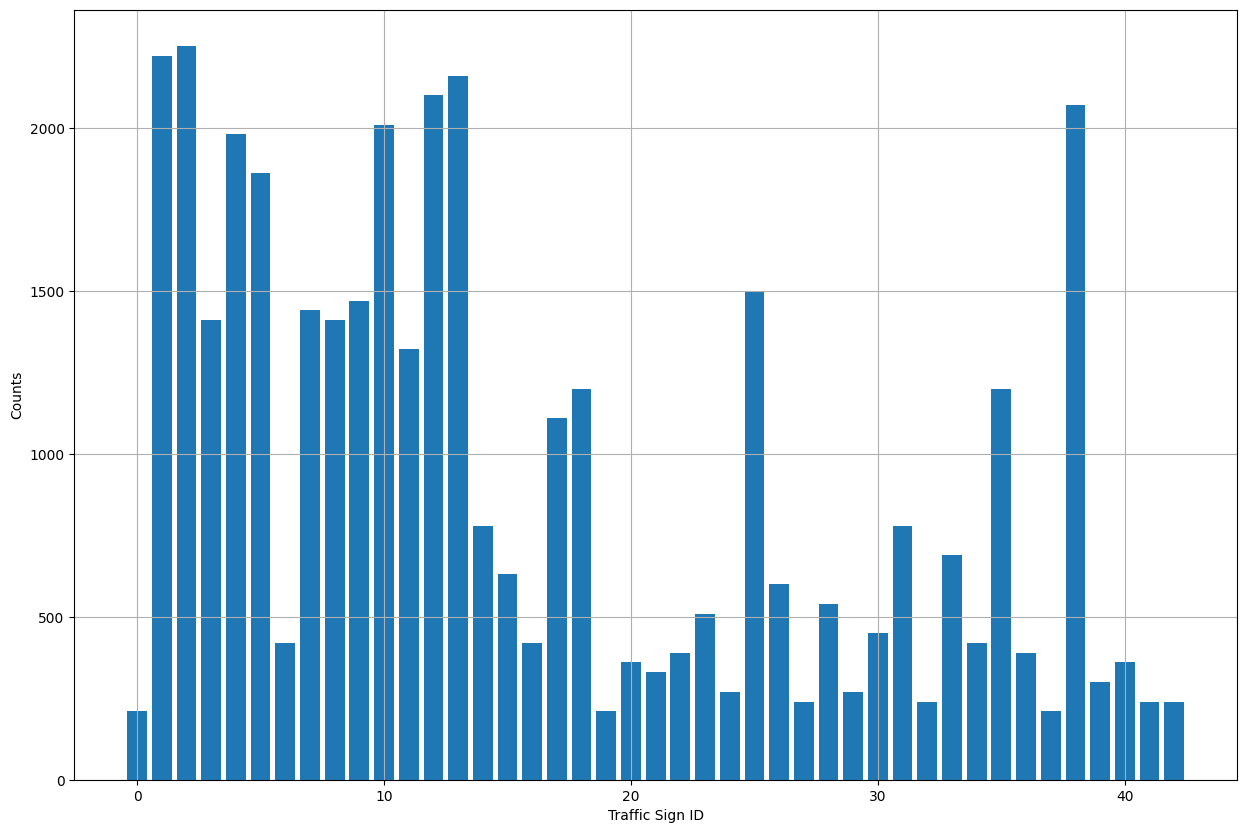

In [5]:
from collections import Counter
hist = Counter(ids)
print(hist.values())

print(f"Mean value of count : {np.mean(list(hist.values()))}")
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?   dataset is not balanced, because  has so mutch differance count for classId
* Are there any classes that are (significantly) over-represented or under-represeneted? ClassId :0,19,24,27,29,32,37,39,41,42 are under-represeneted but 1,2,12,13,38 are  over-represented  (value >2000)  Mean value: 911.8372093023256

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [35]:

def calculate_brightness(image_path):
    image = cv2.imread(os.path.join(root,image_path))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    brightness = np.mean(gray_image)
    return brightness
data['Brightness'] = data['Path'].apply(calculate_brightness)    
    


In [55]:
average_brightness=data.groupby('ClassId')['Brightness'].mean()
print(average_brightness.shape)
print(average_brightness)




(43,)
ClassId
0     122.700563
1     108.080286
2      92.877494
3      67.217306
4      69.444738
5      59.040452
6      40.250423
7      58.481956
8      46.908378
9      92.836807
10     50.392712
11     87.893018
12     89.189308
13     99.214147
14    110.130700
15    100.675646
16    102.828856
17     78.181297
18     95.103850
19     71.518052
20     57.361867
21     83.290628
22    109.747361
23     82.878640
24     81.164900
25     83.347652
26     69.632985
27     76.285239
28    100.117453
29     91.168122
30     72.264249
31     60.767514
32     79.013824
33     82.220509
34    113.344344
35    113.527621
36     82.089981
37     94.465087
38     79.428372
39     80.719306
40     94.206883
41     93.177771
42     52.030146
Name: Brightness, dtype: float64
